In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn_G9_new_15.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7046 non-null   object 
 2   SeniorCitizen     7046 non-null   int64  
 3   Partner           7046 non-null   object 
 4   Dependents        7046 non-null   object 
 5   tenure            7028 non-null   float64
 6   PhoneService      7046 non-null   object 
 7   MultipleLines     7046 non-null   object 
 8   InternetService   7046 non-null   object 
 9   OnlineSecurity    7018 non-null   object 
 10  OnlineBackup      7046 non-null   object 
 11  DeviceProtection  7046 non-null   object 
 12  TechSupport       7046 non-null   object 
 13  StreamingTV       7046 non-null   object 
 14  StreamingMovies   7046 non-null   object 
 15  Contract          7046 non-null   object 
 16  PaperlessBilling  7046 non-null   object 


In [4]:
#tenure has 7028 records(use mean)
#online security has 7018
#Monthly charges has 7041
#we need to make sure that 

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
#TotalCharges was object the above statement changed it to float64
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              18
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity      28
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       5
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
#below statement show that all the null and nan values from Totalcharges has been deleted
#the convertion of datatype from object to float64 made it possible for the changes to take place
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
print(df.duplicated().sum())

2


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(df.duplicated().sum())

0


In [15]:
df.shape

(6983, 21)

In [16]:
#dropped costomerid feature,does not influence y
df.drop(['customerID'],inplace=True,axis=1)

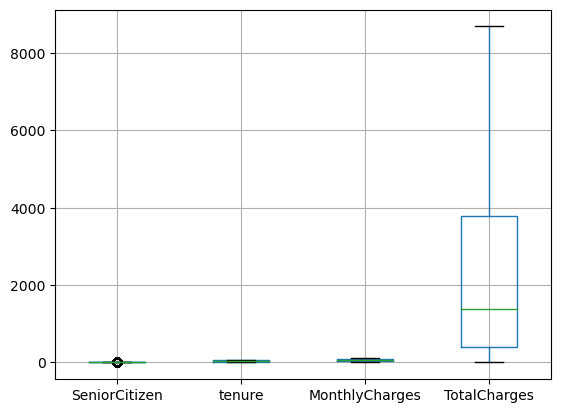

In [17]:
df.boxplot()
plt.show()

In [18]:
Cat_Columns =['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = df[Cat_Columns ].quantile(0.25)
Q3 = df[Cat_Columns ].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Create Boolean arrays indicating outlier rows
outlier_rows = (df[Cat_Columns ] < lower_limit) | (df[Cat_Columns ] > upper_limit)

# Remove the outlier rows from the DataFrame
df = df[~outlier_rows.any(axis=1)]

In [19]:
# Print the new shape of the DataFrame
print("New Shape:", df.shape)

New Shape: (5849, 20)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5849 non-null   object 
 1   SeniorCitizen     5849 non-null   int64  
 2   Partner           5849 non-null   object 
 3   Dependents        5849 non-null   object 
 4   tenure            5849 non-null   float64
 5   PhoneService      5849 non-null   object 
 6   MultipleLines     5849 non-null   object 
 7   InternetService   5849 non-null   object 
 8   OnlineSecurity    5849 non-null   object 
 9   OnlineBackup      5849 non-null   object 
 10  DeviceProtection  5849 non-null   object 
 11  TechSupport       5849 non-null   object 
 12  StreamingTV       5849 non-null   object 
 13  StreamingMovies   5849 non-null   object 
 14  Contract          5849 non-null   object 
 15  PaperlessBilling  5849 non-null   object 
 16  PaymentMethod     5849 non-null   object 


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5849 non-null   object 
 1   SeniorCitizen     5849 non-null   int64  
 2   Partner           5849 non-null   object 
 3   Dependents        5849 non-null   object 
 4   tenure            5849 non-null   float64
 5   PhoneService      5849 non-null   object 
 6   MultipleLines     5849 non-null   object 
 7   InternetService   5849 non-null   object 
 8   OnlineSecurity    5849 non-null   object 
 9   OnlineBackup      5849 non-null   object 
 10  DeviceProtection  5849 non-null   object 
 11  TechSupport       5849 non-null   object 
 12  StreamingTV       5849 non-null   object 
 13  StreamingMovies   5849 non-null   object 
 14  Contract          5849 non-null   object 
 15  PaperlessBilling  5849 non-null   object 
 16  PaymentMethod     5849 non-null   object 


In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [23]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])

In [43]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72.0,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0


In [24]:
# part 1. 1. splitting data into test & training

from sklearn.model_selection import train_test_split


y=df["Churn"]

x=df.drop(["Churn"],axis=1)

x_train, x_test, y_train, y_test = train_test_split (x, y, random_state= 20, test_size=0.2)   

print(x_train)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2440       1              0        1           1    32.0             1   
4096       0              0        0           0    20.0             1   
689        1              0        0           0    51.0             1   
3352       0              0        0           0     1.0             1   
535        1              0        0           0    12.0             1   
...      ...            ...      ...         ...     ...           ...   
1955       0              0        1           1    49.0             1   
4700       0              0        0           0     2.0             1   
1743       1              0        1           0    67.0             1   
5258       1              0        0           0    69.0             1   
3044       0              0        0           0     1.0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2440              0                2     

In [25]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['gender', "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]])
df_scaled = pd.DataFrame(scaled_features, columns=['gender', "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"])

In [26]:
print(y_train)

2440    0
4096    0
689     0
3352    1
535     0
       ..
1955    0
4700    0
1743    0
5258    1
3044    1
Name: Churn, Length: 4679, dtype: int32


In [27]:
df.to_csv("df_scaled.csv")
x_test.to_csv("df_test.csv")
x_train.to_csv("df_train.csv")

In [28]:
print(x_train.shape)

(4679, 19)


In [29]:
print(y_train.shape)

(4679,)


In [30]:
# part 1. 2. building a model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

C:\Users\nico.bilankulu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
# part 1. 3. prediction

y_pred=lr.predict(x_test) 

Comment:- The Classification report using the y_test dataset
Observation:-In precision metrics the model has predicted that 85% of customers are discontinuing and 64% is continuing.
             In Recall metrics the model has predicted that 90% of customers are discontinuing and 53% is continuing.
             In f1-score metrics the model has predicted that 87% of customers are discontinuing and 58% is continuing.
             The accuracy score of the model is 81%

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       872
           1       0.64      0.53      0.58       298

    accuracy                           0.81      1170
   macro avg       0.75      0.71      0.73      1170
weighted avg       0.80      0.81      0.80      1170



Comment:- The Classification report using the y_train dataset 
Observation:-In precision metrics the model has predicted that 86% of customers are discontinuing and 63% is continuing.
             In Recall metrics the model has predicted that 91% of customers are discontinuing and 51% is continuing. 
             In f1-score metrics the model has predicted that 88% of customers are discontinuing and 56% is continuing. 
             The accuracy score of the model is 82%

In [35]:
y_train_pred=lr.predict(x_train)

In [36]:
# part 1. 4. evaluating our model

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3592
           1       0.63      0.51      0.56      1087

    accuracy                           0.82      4679
   macro avg       0.74      0.71      0.72      4679
weighted avg       0.81      0.82      0.81      4679



Final observation:- Our model is perfoming well on both training and testing data sets

In [37]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[785  87]
 [141 157]]


<AxesSubplot:>

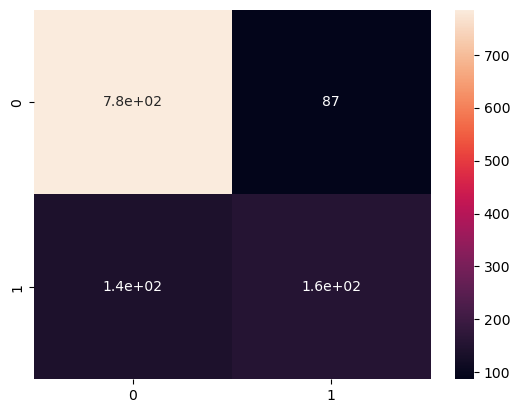

In [38]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

In [39]:
print(lr.intercept_)

[-0.18939477]


In [40]:
print(lr.coef_)

[[-0.06519681  0.         -0.09005354 -0.20596807 -0.08042648 -0.28415638
   0.10092404  0.07197486 -0.44031162 -0.22516012 -0.08624477 -0.41958051
   0.07829339  0.01266765 -0.53831818  0.23786844  0.00278593  0.01457011
   0.00056856]]


In [41]:
x_test.shape

(1170, 19)

In [42]:
import pickle

h=open("Logistic.pkl","wb")
pickle.dump(lr,h)
h=open("Logistic.pkl","rb")
lr=pickle.load(h)

h.close() 